Contribution by Mitesh Kumar Mandal, 242IT020.

In [ ]:
import pandas as pd

# Step 1: Load the datasets
# Load the demographic data
demo = pd.read_sas('DR1TOT_L.xpt')

# Load the glucose data
glu = pd.read_sas('GLU_L.XPT')


print("Unique SEQN values in demo:", demo['SEQN'].unique()[:10])
print("Unique SEQN values in glu:", glu['SEQN'].unique()[:10])

Unique SEQN values in demo: [130378. 130379. 130380. 130381. 130382. 130386. 130387. 130388. 130389.
 130390.]
Unique SEQN values in glu: [130378. 130379. 130380. 130386. 130394. 130395. 130396. 130397. 130398.
 130402.]


In [ ]:
# Check for missing values in each column
missing_values = glu.isnull().sum()

# Display the columns with missing values and their counts
print(missing_values[missing_values > 0])


LBXGLU      324
LBDGLUSI    324
dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming demo and glu are predefined DataFrames
# Step 2: Merge the datasets on SEQN (Participant ID)
merged_data = pd.merge(demo, glu[['SEQN', 'LBXGLU']], on='SEQN', how='inner')
print(merged_data.columns.tolist())

# Step 3: Create a Target Label (Diabetes Status)
merged_data['diabetes_status'] = merged_data['LBXGLU'].apply(lambda x: 1 if x >= 115 else 0)
print(merged_data.columns.tolist())

# 1. Remove rows where all column values are missing
cleaned_data = merged_data.dropna(how='all')

# 2. Identify categorical and numerical columns
categorical_columns = cleaned_data.select_dtypes(include=['object', 'category']).columns
numerical_columns = cleaned_data.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical Columns: {list(categorical_columns)}")
print(f"Numerical Columns: {list(numerical_columns)}")

# Remove rows where LBXGLU is missing
cleaned_data = cleaned_data.dropna(subset=['LBXGLU'])



# Check for missing values in each column
missing_values = cleaned_data.isnull().sum()

# Display the columns with missing values and their counts
print(missing_values[missing_values > 0])

# 3. Fill missing values
# Fill categorical columns with mode
for col in categorical_columns:
    cleaned_data[col].fillna(cleaned_data[col].mode()[0], inplace=True)

# Fill numerical columns with mean
for col in numerical_columns:
    cleaned_data[col].fillna(cleaned_data[col].mean(), inplace=True)

# 4. Encode categorical columns using Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    cleaned_data[col] = le.fit_transform(cleaned_data[col])
    label_encoders[col] = le  # Store the encoder for inverse transformation if needed

print("Missing values handled and categorical data encoded.")


['SEQN', 'WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MRESP', 'DR1HELP', 'DBQ095Z', 'DBD100', 'DRQSPREP', 'DR1STY', 'DR1SKY', 'DRQSDIET', 'DRQSDT1', 'DRQSDT2', 'DRQSDT3', 'DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT7', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10', 'DRQSDT11', 'DRQSDT12', 'DRQSDT91', 'DR1TNUMF', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060', 'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 'DR1TS180', 'DR1TM161', 'DR1TM

<ipython-input-4-203039b0db4e>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data[col].fillna(cleaned_data[col].mean(), inplace=True)


In [ ]:
import pandas as pd

# Ensure you already have a DataFrame named `merged_data`
# Example DataFrame (use your own dataset instead)
# merged_data = pd.read_csv("your_dataset.csv")

# 1. Randomly select 20 rows from the DataFrame
random_rows = merged_data.sample(n=20, random_state=12)
random_rows.to_csv("realData_verify.csv", index=False)
# 2. Remove the 'diabetes_status' column if it exists
if 'diabetes_status' in random_rows.columns:
    random_rows = random_rows.drop(columns=['diabetes_status'])

# 3. Save the selected rows to a CSV file
random_rows.to_csv("realData.csv", index=False)

print("realData.csv file created with 20 randomly selected rows (without the 'diabetes_status' column).")



realData.csv file created with 20 randomly selected rows (without the 'diabetes_status' column).


In [ ]:
# Check for missing values in each column
missing_values = merged_data.isnull().sum()

# Display the columns with missing values and their counts
print(missing_values[missing_values > 0])

WTDR2D       882
DR1EXMER     867
DRABF        883
DRDINT       882
DR1DBIH     1068
            ... 
DRD370TQ    3470
DRD370U     1851
DRD370UQ    3930
DRD370V     1852
LBXGLU       324
Length: 166, dtype: int64


In [ ]:
# Check for missing values in each column
missing_values = cleaned_data.isnull().sum()

# Display the columns with missing values and their counts
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
# Step 7: Split Data into Features (X) and Target (y)
X = cleaned_data.drop(columns=['diabetes_status'])
y = cleaned_data['diabetes_status']

# Step 8: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#save data
y_test.to_csv("y_test.csv", index=False)

# Step 9: Check and Impute Any Remaining NaNs
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 10: Scale the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import numpy as np

# Count 1's and 0's
count_ones = np.sum(y_train == 1)
count_zeros = np.sum(y_train == 0)

print(f"Number of 1's: {count_ones}")
print(f"Number of 0's: {count_zeros}")


Number of 1's: 547
Number of 0's: 2390


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Initialize a model for RFE (e.g., Logistic Regression)
estimator = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator, n_features_to_select=54)

# Fit RFE on the training data and transform it
X_train_rfe = rfe.fit_transform(X_train, y_train)  # Pass the target variable y_train for supervised selection
X_test_rfe = rfe.transform(X_test)  # Transform the test data using the same RFE model

# Confirm the new shape after RFE
print("X_train_rfe shape:", X_train_rfe.shape)
print("X_test_rfe shape:", X_test_rfe.shape)


X_train_rfe shape: (2937, 54)
X_test_rfe shape: (735, 54)


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X_test and y_test are already defined after PCA transformation

# Step 1: Split X_test and y_test into 20% and 80%
X_test_20, X_test_80, y_test_20, y_test_80 = train_test_split(
    X_test, y_test, test_size=0.8, random_state=42
)

# Step 2: Combine X_test_20 and y_test_20 into a single DataFrame for manipulation
test_20_data = pd.DataFrame(X_test_20)
test_20_data['diabetes_status'] = y_test_20.reset_index(drop=True)

# Step 3: Drop the 'diabetes_status' column before saving
test_20_data = test_20_data.drop(columns=['diabetes_status'])

# Step 4: Save the data to a CSV file
test_20_data.to_csv("test_data_20_percent.csv", index=False)

print("Test data (20%) saved to 'test_data_20_percent.csv' without 'diabetes_status' column.")


Test data (20%) saved to 'test_data_20_percent.csv' without 'diabetes_status' column.


--- Bagging ---
Accuracy: 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
Precision: 1.0000
F1-Score: 1.0000
GI: 2.0000
MER: 0.0000
AUC: 1.0000
AUCH: 1.0000
--- Boosting ---
Accuracy: 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
Precision: 1.0000
F1-Score: 1.0000
GI: 2.0000
MER: 0.0000
AUC: 1.0000
AUCH: 1.0000
--- Stacking ---
Accuracy: 0.9891
Sensitivity: 0.9774
Specificity: 0.9917
Precision: 0.9630
F1-Score: 0.9701
GI: 1.9383
MER: 0.0109
AUC: 0.9961
AUCH: 0.9961


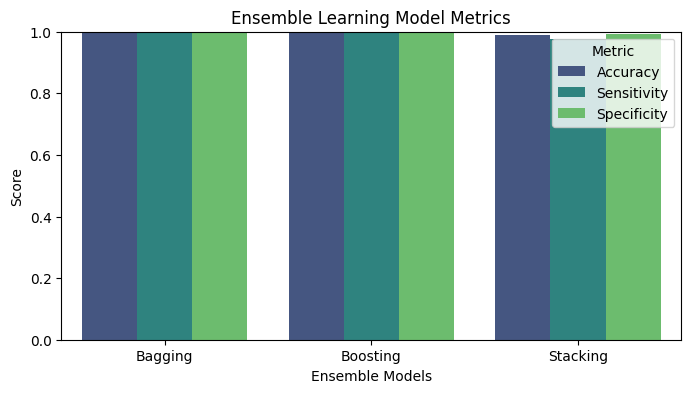

Best model (Bagging) saved to ensemble.pkl


In [ ]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Directory Path
model_path_ensemble = 'ensemble.pkl'

# Initialize the Base Estimators
base_estimator = DecisionTreeClassifier(random_state=42)
logistic_model = LogisticRegression(random_state=42)
svc_model = SVC(probability=True, random_state=42)

# Models: Bagging, Boosting, and Stacking
bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
stacking_model = StackingClassifier(
    estimators=[('lr', logistic_model), ('svc', svc_model)],
    final_estimator=GradientBoostingClassifier(random_state=42)
)

# Fit models
models = {
    "Bagging": bagging_model,
    "Boosting": boosting_model,
    "Stacking": stacking_model,
}

predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)

# Define metrics calculation
def calculate_metrics(y_true, y_pred, y_prob=None):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)  # True positive rate
    specificity = tn / (tn + fp)  # True negative rate
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    gi = 2 * (sensitivity + specificity - 1)  # Gini Index
    mer = 1 - accuracy  # Misclassification Error Rate
    auc = roc_auc_score(y_true, y_prob) if y_prob is not None else None
    auch = auc  # AUCH (Placeholder, typically requires additional calculation)

    return {
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "F1-Score": f1,
        "GI": gi,
        "MER": mer,
        "AUC": auc,
        "AUCH": auch
    }

# Evaluate metrics for all models
all_metrics = {}
for model_name, model in models.items():
    y_pred = predictions[model_name]
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    metrics = calculate_metrics(y_test, y_pred, y_prob)
    all_metrics[model_name] = metrics
    print(f"--- {model_name} ---")
    for metric_name, value in metrics.items():
        if value is not None:
            print(f"{metric_name}: {value:.4f}")

# Visualize Metrics (Accuracy, Sensitivity, Specificity)
import pandas as pd

# Prepare data for plotting
plot_data = []
for model_name, metrics in all_metrics.items():
    for metric_name in ["Accuracy", "Sensitivity", "Specificity"]:
        plot_data.append({
            "Model": model_name,
            "Metric": metric_name,
            "Score": metrics[metric_name]
        })

df_plot = pd.DataFrame(plot_data)

# Plot the data
plt.figure(figsize=(8, 4))
sns.barplot(data=df_plot, x="Model", y="Score", hue="Metric", palette="viridis")
plt.title("Ensemble Learning Model Metrics")
plt.xlabel("Ensemble Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.show()


# Save the best model
best_model_name = max(all_metrics, key=lambda name: all_metrics[name]["Accuracy"])
with open(model_path_ensemble, 'wb') as model_file_ensemble:
    pickle.dump(models[best_model_name], model_file_ensemble)

print(f"Best model ({best_model_name}) saved to {model_path_ensemble}")


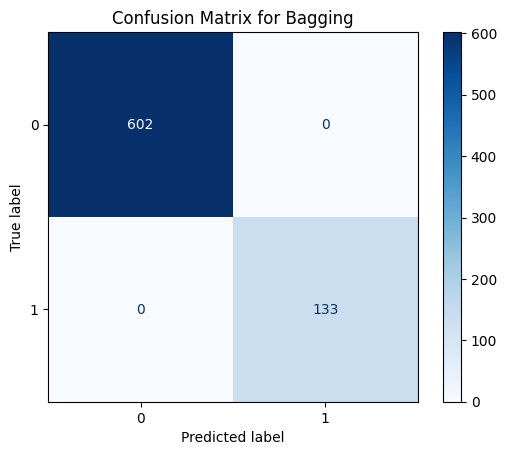

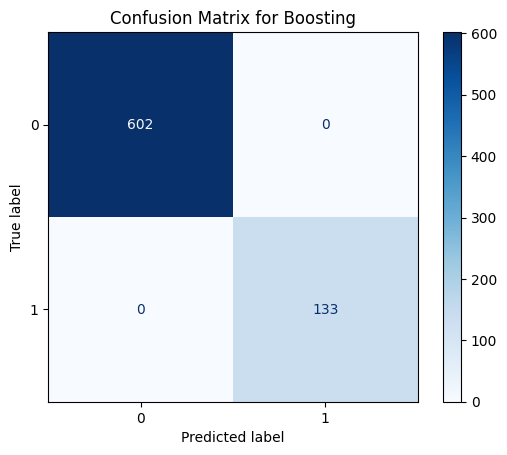

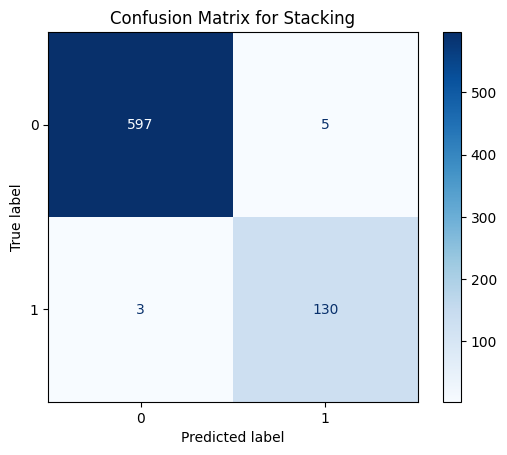

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Display Confusion Matrix for each model
for model_name, model in models.items():  # Unpack into model_name and model only
    y_pred = predictions[model_name]  # Get y_pred from predictions dictionary
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, auc
)
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# Initialize SVC models with different kernels
svc_linear = SVC(kernel='linear', probability=True, random_state=42)
svc_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
svc_rbf = SVC(kernel='rbf', probability=True, random_state=42)

# Train each model
svc_linear.fit(X_train, y_train)
svc_poly.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)

# Predict using each model
y_pred_linear = svc_linear.predict(X_test)
y_pred_poly = svc_poly.predict(X_test)
y_pred_rbf = svc_rbf.predict(X_test)

# Predict probabilities for AUC/AUCH calculation
y_prob_linear = svc_linear.predict_proba(X_test)[:, 1]
y_prob_poly = svc_poly.predict_proba(X_test)[:, 1]
y_prob_rbf = svc_rbf.predict_proba(X_test)[:, 1]

# Function to calculate all metrics
def calculate_metrics(y_test, y_pred, y_prob):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Extract TN, FP, FN, TP from the confusion matrix

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    sensitivity = recall_score(y_test, y_pred)  # Recall is the same as Sensitivity
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    f1 = f1_score(y_test, y_pred, zero_division=1)
    gi = 2 * roc_auc_score(y_test, y_prob) - 1  # Gini Index
    mer = 1 - accuracy  # Misclassification Error Rate
    auc_value = roc_auc_score(y_test, y_prob)  # Area Under Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auch = auc(fpr, tpr)  # Alternative AUC calculation for verification

    return {
        "Confusion Matrix": cm,
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "F1-Score": f1,
        "GI": gi,
        "MER": mer,
        "AUC": auc_value,
        "AUCH": auch
    }

# Evaluate all models
models = {
    "Linear Kernel": (y_pred_linear, y_prob_linear),
    "Polynomial Kernel": (y_pred_poly, y_prob_poly),
    "RBF Kernel": (y_pred_rbf, y_prob_rbf)
}

# Display results for each model
for model_name, (y_pred, y_prob) in models.items():
    print(f"\n--- {model_name} ---")
    metrics = calculate_metrics(y_test, y_pred, y_prob)
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")



--- Linear Kernel ---
Confusion Matrix: [[595   7]
 [  5 128]]
Accuracy: 0.9836734693877551
Sensitivity: 0.9624060150375939
Specificity: 0.9883720930232558
Precision: 0.9481481481481482
F1-Score: 0.9552238805970149
GI: 0.9829016061749056
MER: 0.01632653061224487
AUC: 0.9914508030874528
AUCH: 0.9914508030874528

--- Polynomial Kernel ---
Confusion Matrix: [[591  11]
 [112  21]]
Accuracy: 0.8326530612244898
Sensitivity: 0.15789473684210525
Specificity: 0.9817275747508306
Precision: 0.65625
F1-Score: 0.2545454545454545
GI: 0.6293308020882771
MER: 0.1673469387755102
AUC: 0.8146654010441385
AUCH: 0.8146654010441385

--- RBF Kernel ---
Confusion Matrix: [[602   0]
 [ 70  63]]
Accuracy: 0.9047619047619048
Sensitivity: 0.47368421052631576
Specificity: 1.0
Precision: 1.0
F1-Score: 0.6428571428571429
GI: 0.9617565508455523
MER: 0.09523809523809523
AUC: 0.9808782754227762
AUCH: 0.9808782754227762


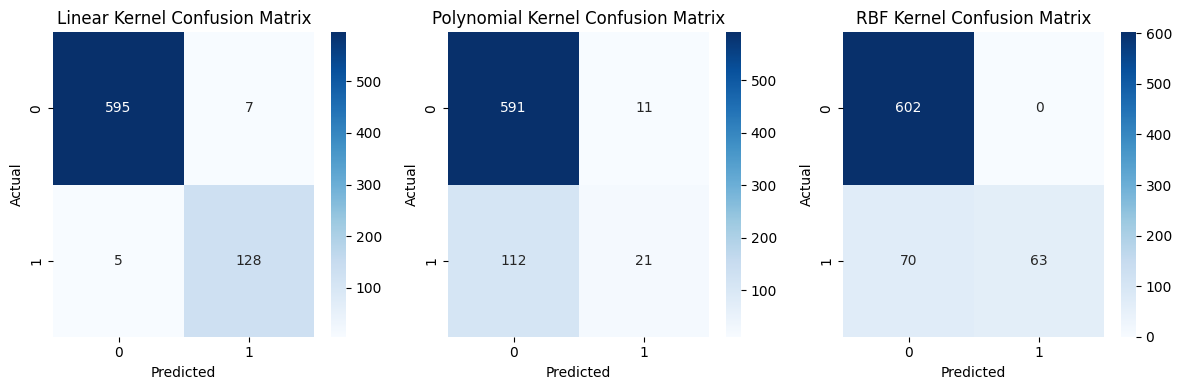

<ipython-input-14-b9ee643f3a81>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=metric_values[metric], palette='viridis')
<ipython-input-14-b9ee643f3a81>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=metric_values[metric], palette='viridis')
<ipython-input-14-b9ee643f3a81>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=metric_values[metric], palette='viridis')
<ipython-input-14-b9ee643f3a81>:68: FutureWarning: 

Passing `palette` without assigning `hue` is

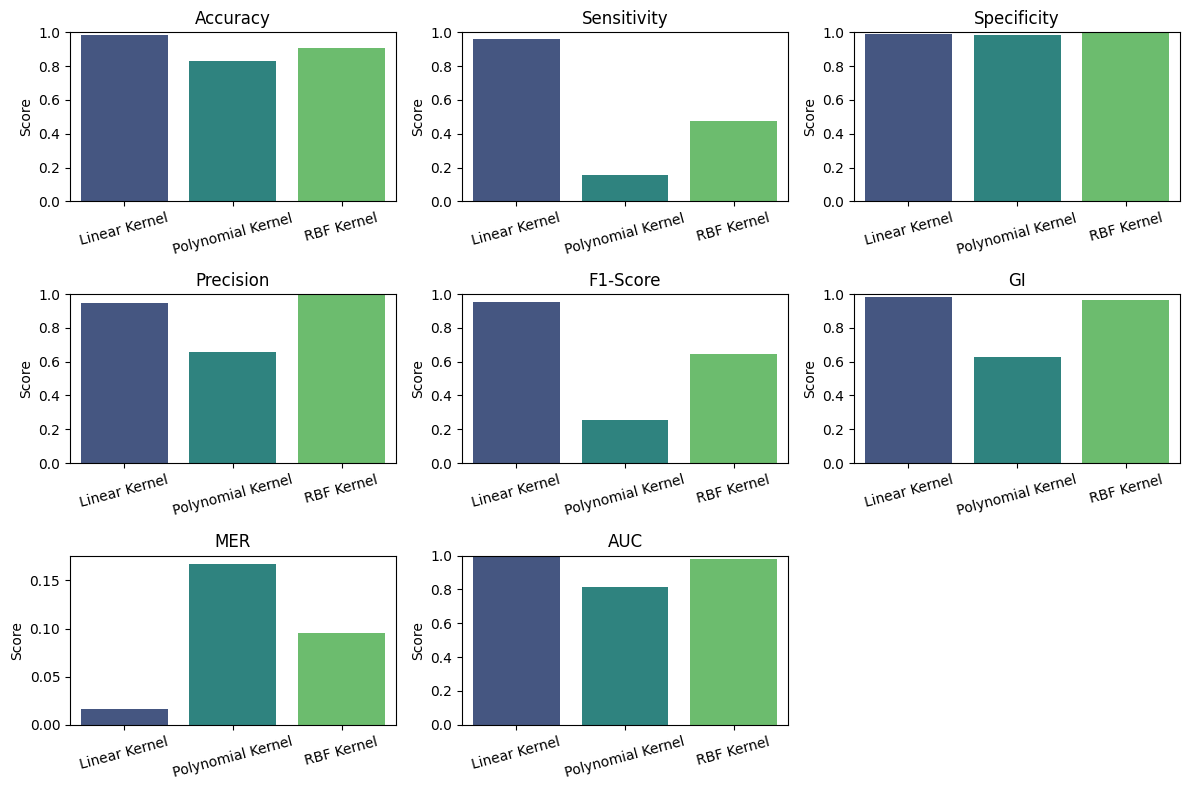

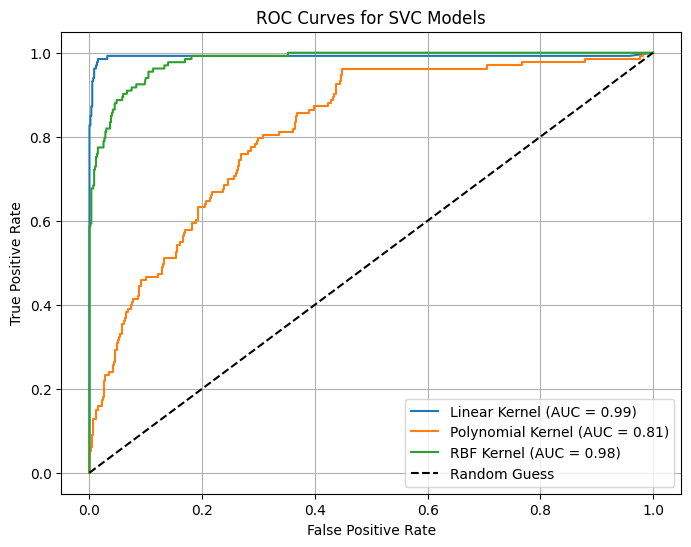

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc

# Function to calculate metrics (as defined earlier)
def calculate_metrics(y_test, y_pred, y_prob):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    f1 = f1_score(y_test, y_pred, zero_division=1)
    gi = 2 * roc_auc_score(y_test, y_prob) - 1
    mer = 1 - accuracy
    auc_value = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auch = auc(fpr, tpr)

    return {
        "Confusion Matrix": cm,
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "F1-Score": f1,
        "GI": gi,
        "MER": mer,
        "AUC": auc_value,
        "AUCH": auch,
        "FPR": fpr,
        "TPR": tpr
    }

# Evaluate metrics for all models
models = {
    "Linear Kernel": (y_pred_linear, y_prob_linear),
    "Polynomial Kernel": (y_pred_poly, y_prob_poly),
    "RBF Kernel": (y_pred_rbf, y_prob_rbf)
}

results = {}
for model_name, (y_pred, y_prob) in models.items():
    results[model_name] = calculate_metrics(y_test, y_pred, y_prob)

# 1. Plot Confusion Matrices
plt.figure(figsize=(12, 4))
for i, (model_name, metrics) in enumerate(results.items(), start=1):
    plt.subplot(1, 3, i)
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# 2. Plot Metrics (Accuracy, Sensitivity, Specificity, Precision, F1-Score)
metrics_to_plot = ["Accuracy", "Sensitivity", "Specificity", "Precision", "F1-Score", "GI", "MER", "AUC"]
metric_values = {metric: [metrics[metric] for metrics in results.values()] for metric in metrics_to_plot}

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics_to_plot, start=1):
    plt.subplot(3, 3, i)
    sns.barplot(x=list(results.keys()), y=metric_values[metric], palette='viridis')
    plt.title(metric)
    plt.ylabel("Score")
    plt.ylim(0, 1 if metric != "MER" else None)
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

# 3. Plot ROC Curves
plt.figure(figsize=(8, 6))
for model_name, metrics in results.items():
    fpr, tpr = metrics["FPR"], metrics["TPR"]
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {metrics['AUC']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curves for SVC Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
!pip install gradio

In [ ]:
import pandas as pd
import joblib
import gradio as gr

# Load the best model
model_file_map = {
    "Ensemble": "ensemble.pkl",
    "Neural": "neural_network.pkl",
}

# Specify the desired model here
best_model_filename = model_file_map['Ensemble']
best_model = joblib.load(f"{best_model_filename}")

# Preprocessing function
def preprocess(data):
    """
    Preprocess the input data to match the model's training requirements.
    Modify based on your dataset and model needs.
    """
    # Handle missing values
    data = data.fillna(0)  # Replace missing values with 0 (adjust as needed)

    # Ensure numeric columns are properly formatted
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric where possible
    data = data.fillna(0)  # Handle non-convertible values

    return data

# Function to process the uploaded CSV file and predict
def process_and_predict(file):
    try:
        # Load the CSV file
        data = pd.read_csv(file.name)
    except Exception as e:
        return f"Error reading the CSV file: {e}"

    # Display initial file structure for debugging
    print("CSV File Preview:")
    print(data.head())

    # Ensure proper column structure
    try:
        data = preprocess(data)
    except Exception as e:
        return f"Error during preprocessing: {e}"

    # Ensure the model can predict using the processed data
    try:
        predictions = best_model.predict(data)
    except Exception as e:
        return f"Error during prediction: {e}"

    # Convert predictions to labels
    labels = ["Non-Diabetic" if pred == 0 else "Diabetic" for pred in predictions]

    return pd.DataFrame({"Prediction": predictions, "Label": labels}).to_string(index=False)

# Define the Gradio interface
interface = gr.Interface(
    fn=process_and_predict,
    inputs=gr.File(label="Upload CSV File"),
    outputs=gr.Textbox(label="Predictions"),
    title="Diabetes Prediction",
    description="Upload a CSV file to predict whether the individual is Non-Diabetic (0) or Diabetic (1).",
)

# Launch the interface
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://71a1e2460d7ab1ef91.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd

# Function to calculate correlation with the target column
def calculate_correlations(df, target_column):
    if target_column not in df.columns:
        raise ValueError(f"LBXGLU '{target_column}' not found in the DataFrame.")

    # Calculate correlations with the target column
    correlations = df.corr()[target_column].sort_values(ascending=False)
    return correlations


target_column = 'LBXGLU'  # Replace with your target column name
try:
    correlations = calculate_correlations(merged_data, target_column)
    print("Correlations with the target column:")
    print(correlations)
except ValueError as e:
    print(e)


In [ ]:
import pandas as pd

# Function to calculate correlation with the target column
def calculate_correlations(df, target_column):
    if target_column not in df.columns:
        raise ValueError(f"Column '{target_column}' not found in the DataFrame.")

    # Calculate correlations with the target column
    correlations = df.corr()[target_column].sort_values(ascending=False)
    return correlations

# Function to format results with fixed decimal places
def format_fixed(correlations, decimal_places=5):
    return correlations.apply(lambda x: f"{x:.{decimal_places}f}")  # Format to fixed decimals


target_column = 'LBXGLU'
    correlations = calculate_correlations(merged_data, target_column)
    formatted_correlations = format_fixed(correlations)
    print("Correlations with the target column:")
    print(formatted_correlations)
except ValueError as e:
    print(e)
